### ''' Assessment : (Fujitsu)
Dataset:
https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

Questions:
1. Are there any correlations among systemic_crisis, currency_crises, inflation_crises and banking_crisis ?

2. Is there any relation between yearly change in exch_usd and inflation_annual_cpi?

3. Which country has most stable exchange rate over the years?

4. Which country has most stable inflation_annual_cpi over the years?

5. Does gaining indepnendence has any effects on exch_usd and inflation_annual_cpi ?

Please provide your source code, calculations, plots to support your answers.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('african_crises.csv')

In [3]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
data.shape

(1059, 14)

In [5]:
dummy = pd.get_dummies(data['banking_crisis'])
dummy.head()

,crisis,no_crisis
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [6]:
data = data.merge(dummy, left_index = True, right_index = True)
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,crisis,no_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,0,1


### 1. Are there any correlations among systemic_crisis, currency_crises, inflation_crises and banking_crisis ?

In [7]:
correlation = list(['systemic_crisis','currency_crises','inflation_crises','crisis'])
data[correlation].corr()

,systemic_crisis,currency_crises,inflation_crises,crisis
systemic_crisis,1.000000,0.112751,0.172562,0.853702
currency_crises,0.112751,1.000000,0.393376,0.166859
inflation_crises,0.172562,0.393376,1.000000,0.235852
crisis,0.853702,0.166859,0.235852,1.000000


Ans 1: 
-From the above table it is apparent that there is high correlation between systemic_crisis and banking_crisis (0.85)
-Currency_crises and inflation_crises have the next highest correlation(0.39)
-Rest have slight positive correlation to each other

Note: correlation coefficient can vary from -1.0 to 1.0

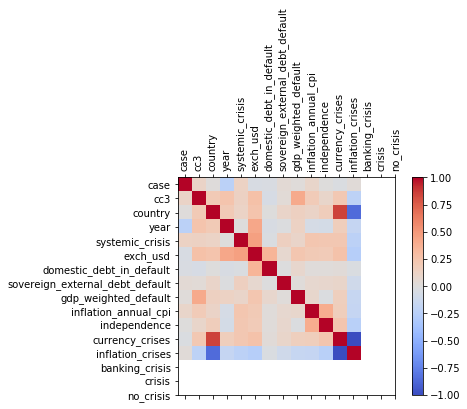

In [8]:
# calculating correlation between variables by plotting : 
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### 2. Is there any relation between yearly change in exch_usd and inflation_annual_cpi?

In [9]:
correlation = list(['exch_usd','inflation_annual_cpi'])
data[correlation].corr()

,exch_usd,inflation_annual_cpi
exch_usd,1.000000,-0.011947
inflation_annual_cpi,-0.011947,1.000000


Answer 2 : There is a slight negative correlation between exch_usd and inflation_annual_cpi (-.011947) 

### 3. Which country has most stable exchange rate over the years?

In [10]:
data.groupby(data['country']).var().sort_values('exch_usd').head(1)

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,crisis,no_crisis
country,,,,,,,,,,,,,
Egypt,0.0,2015.0,0.037453,2.978427,0.0,0.037453,0.005992,96.144896,0.0,0.049267,0.066359,0.066359,0.066359


Answer 3 : From the above column it is apparent that Egypt has the least variance in exch_usd; hence Egypt has the most stable exchange rate over the years

### 4. Which country has most stable inflation_annual_cpi over the years?

In [11]:
data.groupby(data['country']).var().sort_values('inflation_annual_cpi').head(1)

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,crisis,no_crisis
country,,,,,,,,,,,,,
Ivory Coast,0.0,336.0,0.06042,34563.267148,0.0,0.252432,0.0,43.550692,0.112647,0.015873,0.06042,0.06042,0.06042


Answer 4: From the above result it is apparent that the country which has the least variance and hence the most stable inflation_annual_cpi over the years is Ivory Coast

### 5. Does gaining indepnendence has any effects on exch_usd and inflation_annual_cpi ?

In [12]:
correlation = list(['independence','exch_usd','inflation_annual_cpi'])
data[correlation].corr()

,independence,exch_usd,inflation_annual_cpi
independence,1.000000,0.126034,0.016569
exch_usd,0.126034,1.000000,-0.011947
inflation_annual_cpi,0.016569,-0.011947,1.000000


Answer 5: From the above observation it is apparent that having independence can have a positive correlation with exch_usd and inflation_annual_cpi